In [24]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
train = pd.read_csv("../data/data_train.csv")
ICM_metadata = pd.read_csv("../data/data_ICM_metadata.csv")

In [5]:
len(np.unique(train['item_id']))

38121

In [3]:
train.head()

,item_id,feature_id,data
0,2519,0,1.0
1,2642,0,1.0
2,3316,0,1.0
3,3400,0,1.0
4,3472,0,1.0


In [11]:
len(np.unique(ICM_metadata['feature_id'])) 

94331

In [30]:
np.unique(ICM_metadata['feature_id'], return_counts=True)

(array([    0,     1,     2, ..., 94328, 94329, 94330]),
 array([   31,    66, 38121, ...,     1,     1,     1]))

In [39]:
np.sort(np.unique(train['user_id'], return_counts=True)[1])

array([  12,   13,   13, ..., 2224, 3040, 5895])

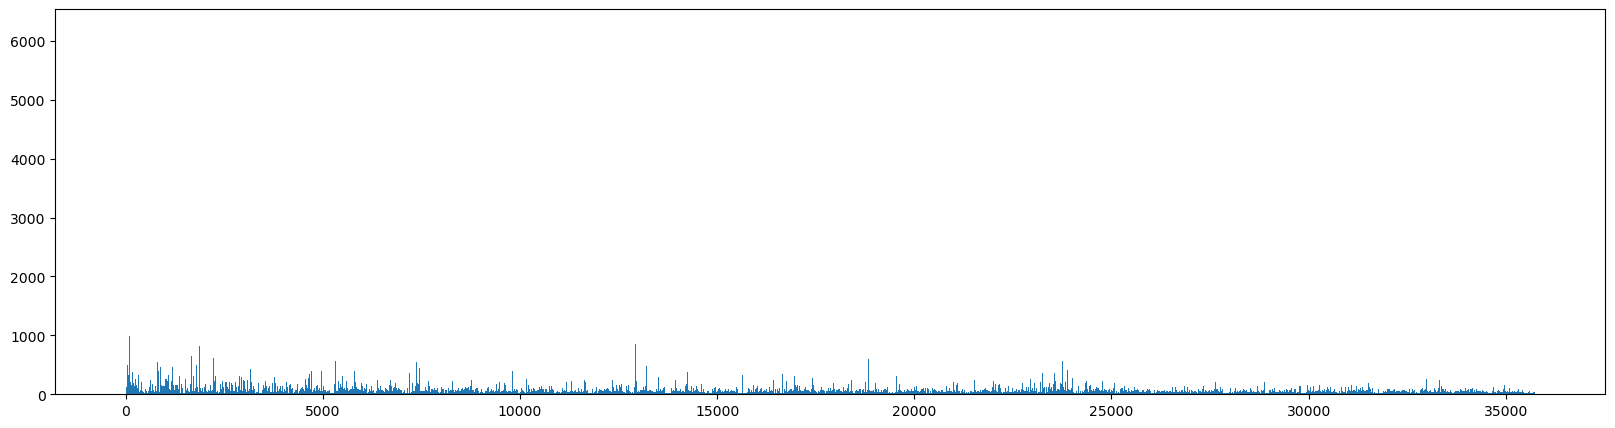

In [29]:
figure(figsize=(20, 5))
plt.hist(train['user_id'], bins=20000)
plt.show()

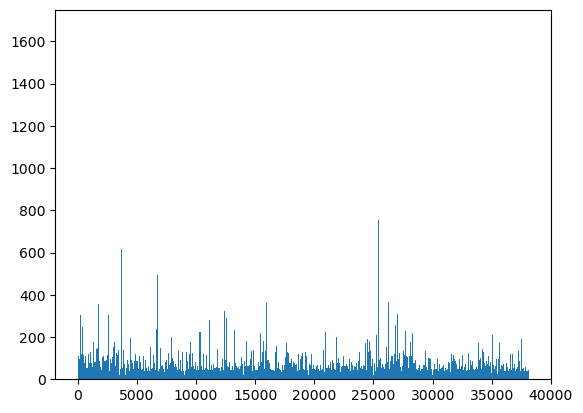

In [23]:
plt.hist(train['item_id'], bins=20000)
plt.show()

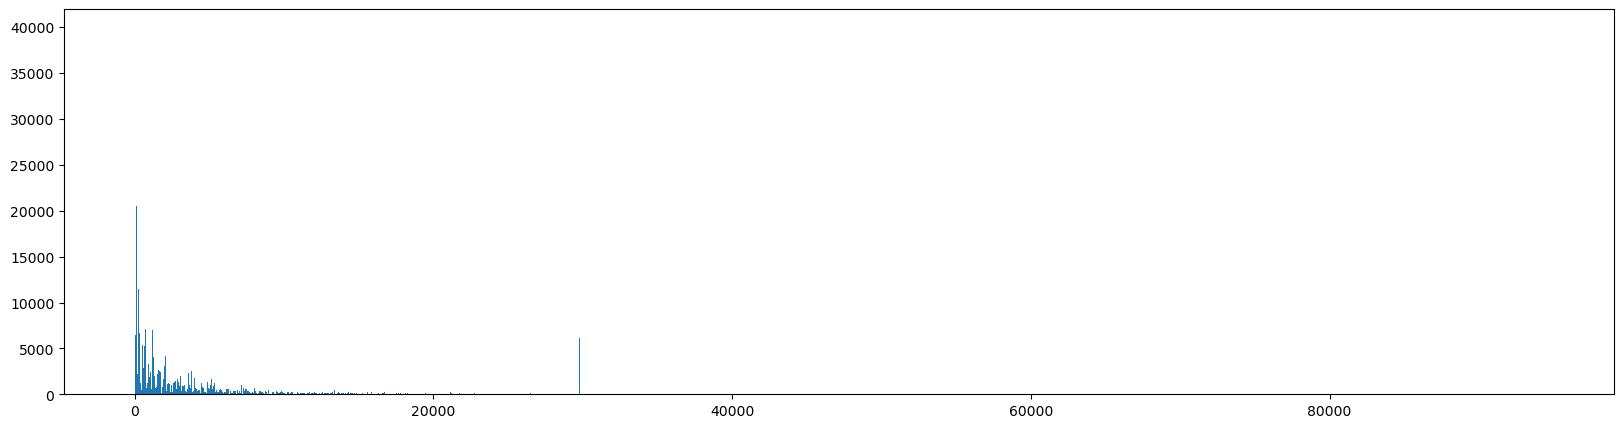

In [44]:
figure(figsize=(20, 5))
plt.hist(ICM_metadata['feature_id'], bins=20000)
plt.show()

In [4]:
ICM_metadata.head()

,user_id,item_id,data
0,0,0,1.0
1,0,2,1.0
2,0,120,1.0
3,0,128,1.0
4,0,211,1.0


In [5]:
urm = sp.coo_matrix((train['data'], (train['user_id'], train['item_id']))).tocsr()
icm = sp.coo_matrix((ICM_metadata['data'], (ICM_metadata['item_id'], ICM_metadata['feature_id']))).tocsr()

urm, icm

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 2940040 stored elements and shape (38121, 94331)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1764607 stored elements and shape (35736, 38121)>)

The shapes of the User-Rating Matrix and Item-Content Matrix are:
$$\text{URM}\in \mathbb{R}^{|U|\times|I|}$$
$$\text{ICM}\in \mathbb{R}^{|I|\times|F|}$$